# PTB-XL

This notebook unpacks the contents of the PTB-XL database, showing the splits between the different diagnostic types, and other class distributions.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import ast
from pathlib import Path

plt.rcParams.update({ "font.family": "serif", "font.serif": ["Times New Roman"], "mathtext.fontset": "cm"}) # for math symbols })

{'MI': 4379, 'HYP': 2119, 'CD': 3907, 'STTC': 4186, 'NORM': 7596}
{'MI': 540, 'HYP': 268, 'CD': 495, 'STTC': 528, 'NORM': 955}
{'MI': 550, 'HYP': 262, 'CD': 496, 'STTC': 521, 'NORM': 963}


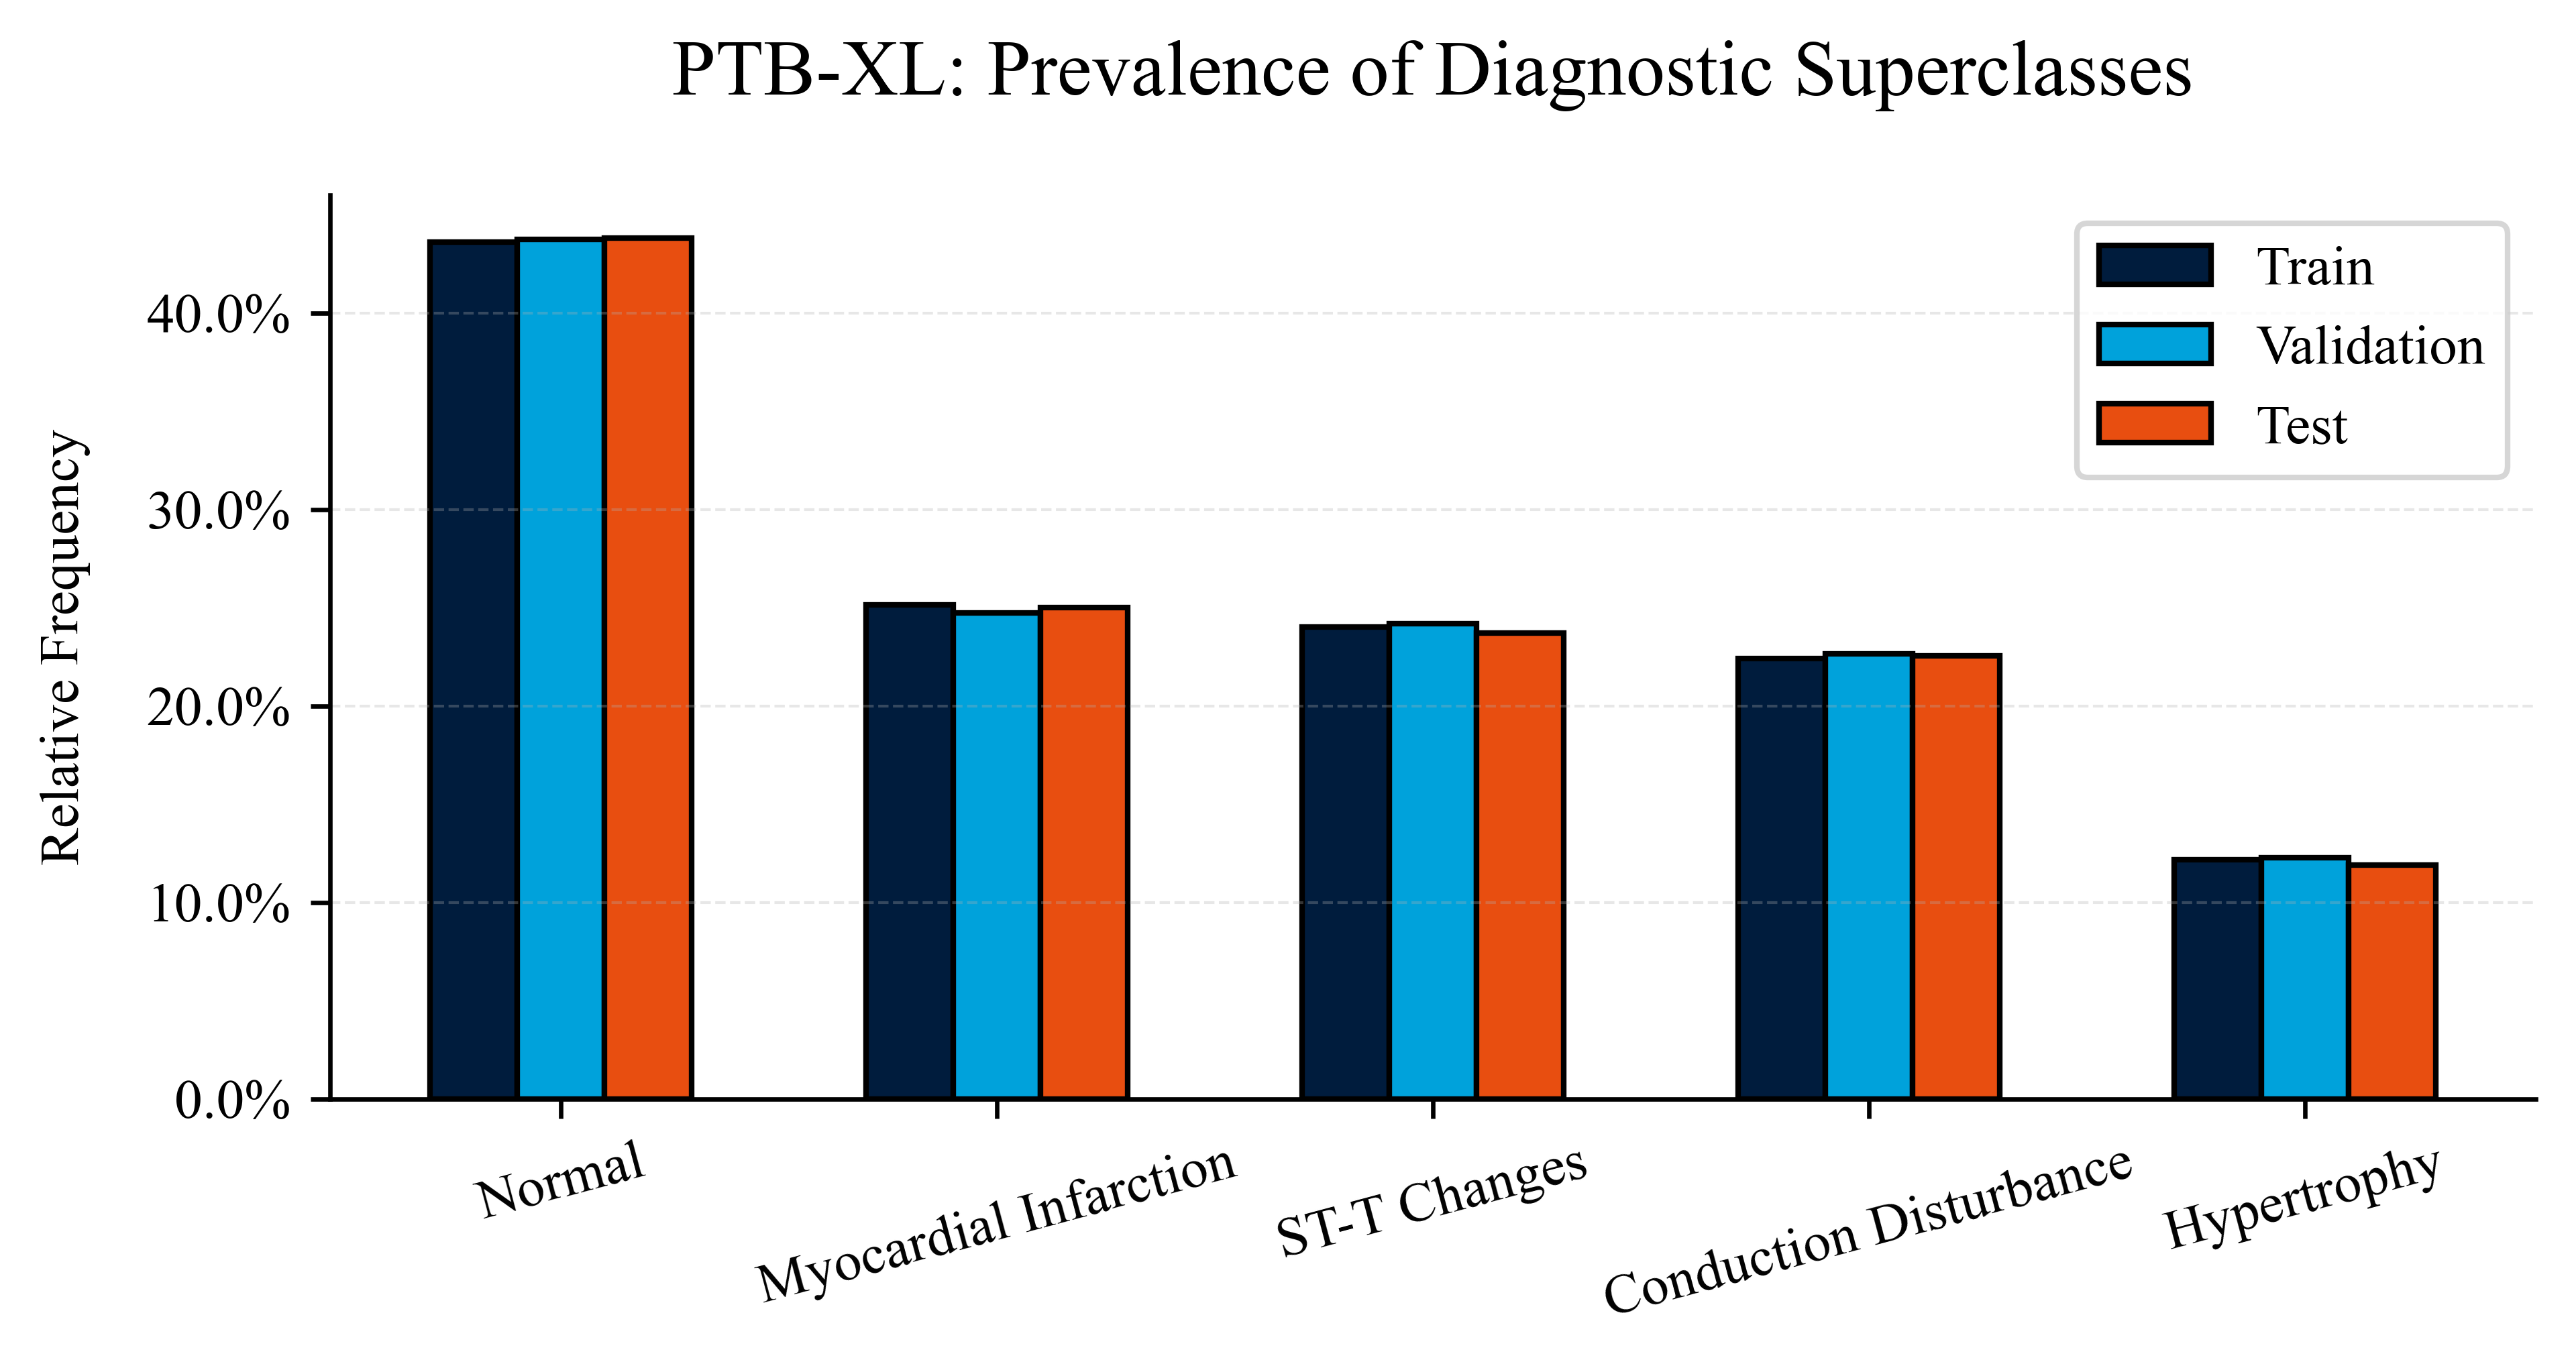

'figures/diagnostic_superclass_distribution'

In [8]:
# Load the validation set metadata
train_meta = '../../data/processed/ptbxl100all/all/meta_train.csv'
val_meta = '../../data/processed/ptbxl100all/all/meta_val.csv'
test_meta = '../../data/processed/ptbxl100all/all/meta_test.csv'

train_meta = pd.read_csv(train_meta)
val_meta = pd.read_csv(val_meta)
test_meta = pd.read_csv(test_meta)

train_meta['scp_codes'] = train_meta['scp_codes'].apply(lambda x: ast.literal_eval(x))
val_meta['scp_codes'] = val_meta['scp_codes'].apply(lambda x: ast.literal_eval(x))
test_meta['scp_codes'] = test_meta['scp_codes'].apply(lambda x: ast.literal_eval(x))

THRESHOLD = 0.5
def codes_above_threshold(code_dict, thr=THRESHOLD):
    return {code for code, prob in code_dict.items() if prob >= thr}

train_meta['present_codes'] = train_meta['scp_codes'].apply(lambda x: codes_above_threshold(x, THRESHOLD))
val_meta['present_codes'] = val_meta['scp_codes'].apply(lambda x: codes_above_threshold(x, THRESHOLD))
test_meta['present_codes'] = test_meta['scp_codes'].apply(lambda x: codes_above_threshold(x, THRESHOLD))

# Plot the distribution of diagnostic superclasses in all datasets
def get_superclass_counts(meta):
    diagnostic_superclasses = {
        'NORM', 'MI', 'STTC', 'HYP', 'CD'
    }

    counts = {cls: 0 for cls in diagnostic_superclasses}
    for index, row in meta.iterrows():
        for code in diagnostic_superclasses:
            if code in row['diagnostic_superclass']:
                counts[code] += 1

    print(counts)


    # Create a DataFrame for plotting
    superclass_counts = pd.Series(counts)
    superclass_counts = superclass_counts[superclass_counts > 0]
    superclass_counts = superclass_counts.sort_values(ascending=False)

    return superclass_counts


# Plot the distribution of diagnostic superclasses in the training set
train_superclass_counts = get_superclass_counts(train_meta)
val_superclass_counts = get_superclass_counts(val_meta)
test_superclass_counts = get_superclass_counts(test_meta)

# Maastricht colours
dark_blue = '#001C3D'
light_blue = '#00A2DB'
orange_red = '#E84E10'
orange = '#F39425'

# Normalize the counts
train_superclass_counts = train_superclass_counts / len(train_meta)
val_superclass_counts = val_superclass_counts / len(val_meta)
test_superclass_counts = test_superclass_counts / len(test_meta)

# Plotting
fig, ax = plt.subplots(figsize=(6.5, 3.5), dpi=600)

# Bar specs
w, x = 0.2, np.arange(len(train_superclass_counts))

# Bars
ax.bar(x - w, train_superclass_counts.values, label='Train', alpha=1, width=w, color=dark_blue, edgecolor='black')
ax.bar(x, val_superclass_counts.values, label='Validation', alpha=1, width=w, color=light_blue, edgecolor='black')
ax.bar(x + w, test_superclass_counts.values, label='Test', alpha=1, width=w, color=orange_red, edgecolor='black')

# X-axis
code_to_label = {
    'NORM': 'Normal',
    'MI': 'Myocardial Infarction',
    'STTC': 'ST-T Changes',
    'HYP': 'Hypertrophy',
    'CD': 'Conduction Disturbance'
}
ax.set_xticks(x)
ax.set_xticklabels([code_to_label[code] for code in train_superclass_counts.index], rotation=15, ha='center', fontsize=10, fontweight='regular')

# Y-axis
ax.set_ylabel('Relative Frequency', fontsize=10, fontweight='regular', labelpad=10)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
for label in ax.get_yticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(10)

# Annotate bars with % values
#for container in ax.containers:
    #ax.bar_label(container, labels=[f'{v*100:0.1f}%' for v in container.datavalues], padding=3, fontsize=8)

# Title and legend
ax.set_title('PTB-XL: Prevalence of Diagnostic Superclasses', pad=18, fontsize=14, weight='regular')
ax.legend(frameon=True, fontsize=10, loc="upper right")

# Aesthetics
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.3)

fig.tight_layout()

# Save publication ready figure
file_path = 'figures/diagnostic_superclass_distribution'
fig.savefig(file_path + '.pdf', format='pdf', bbox_inches='tight')
fig.savefig(file_path + '.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

file_path

Horizontal bars

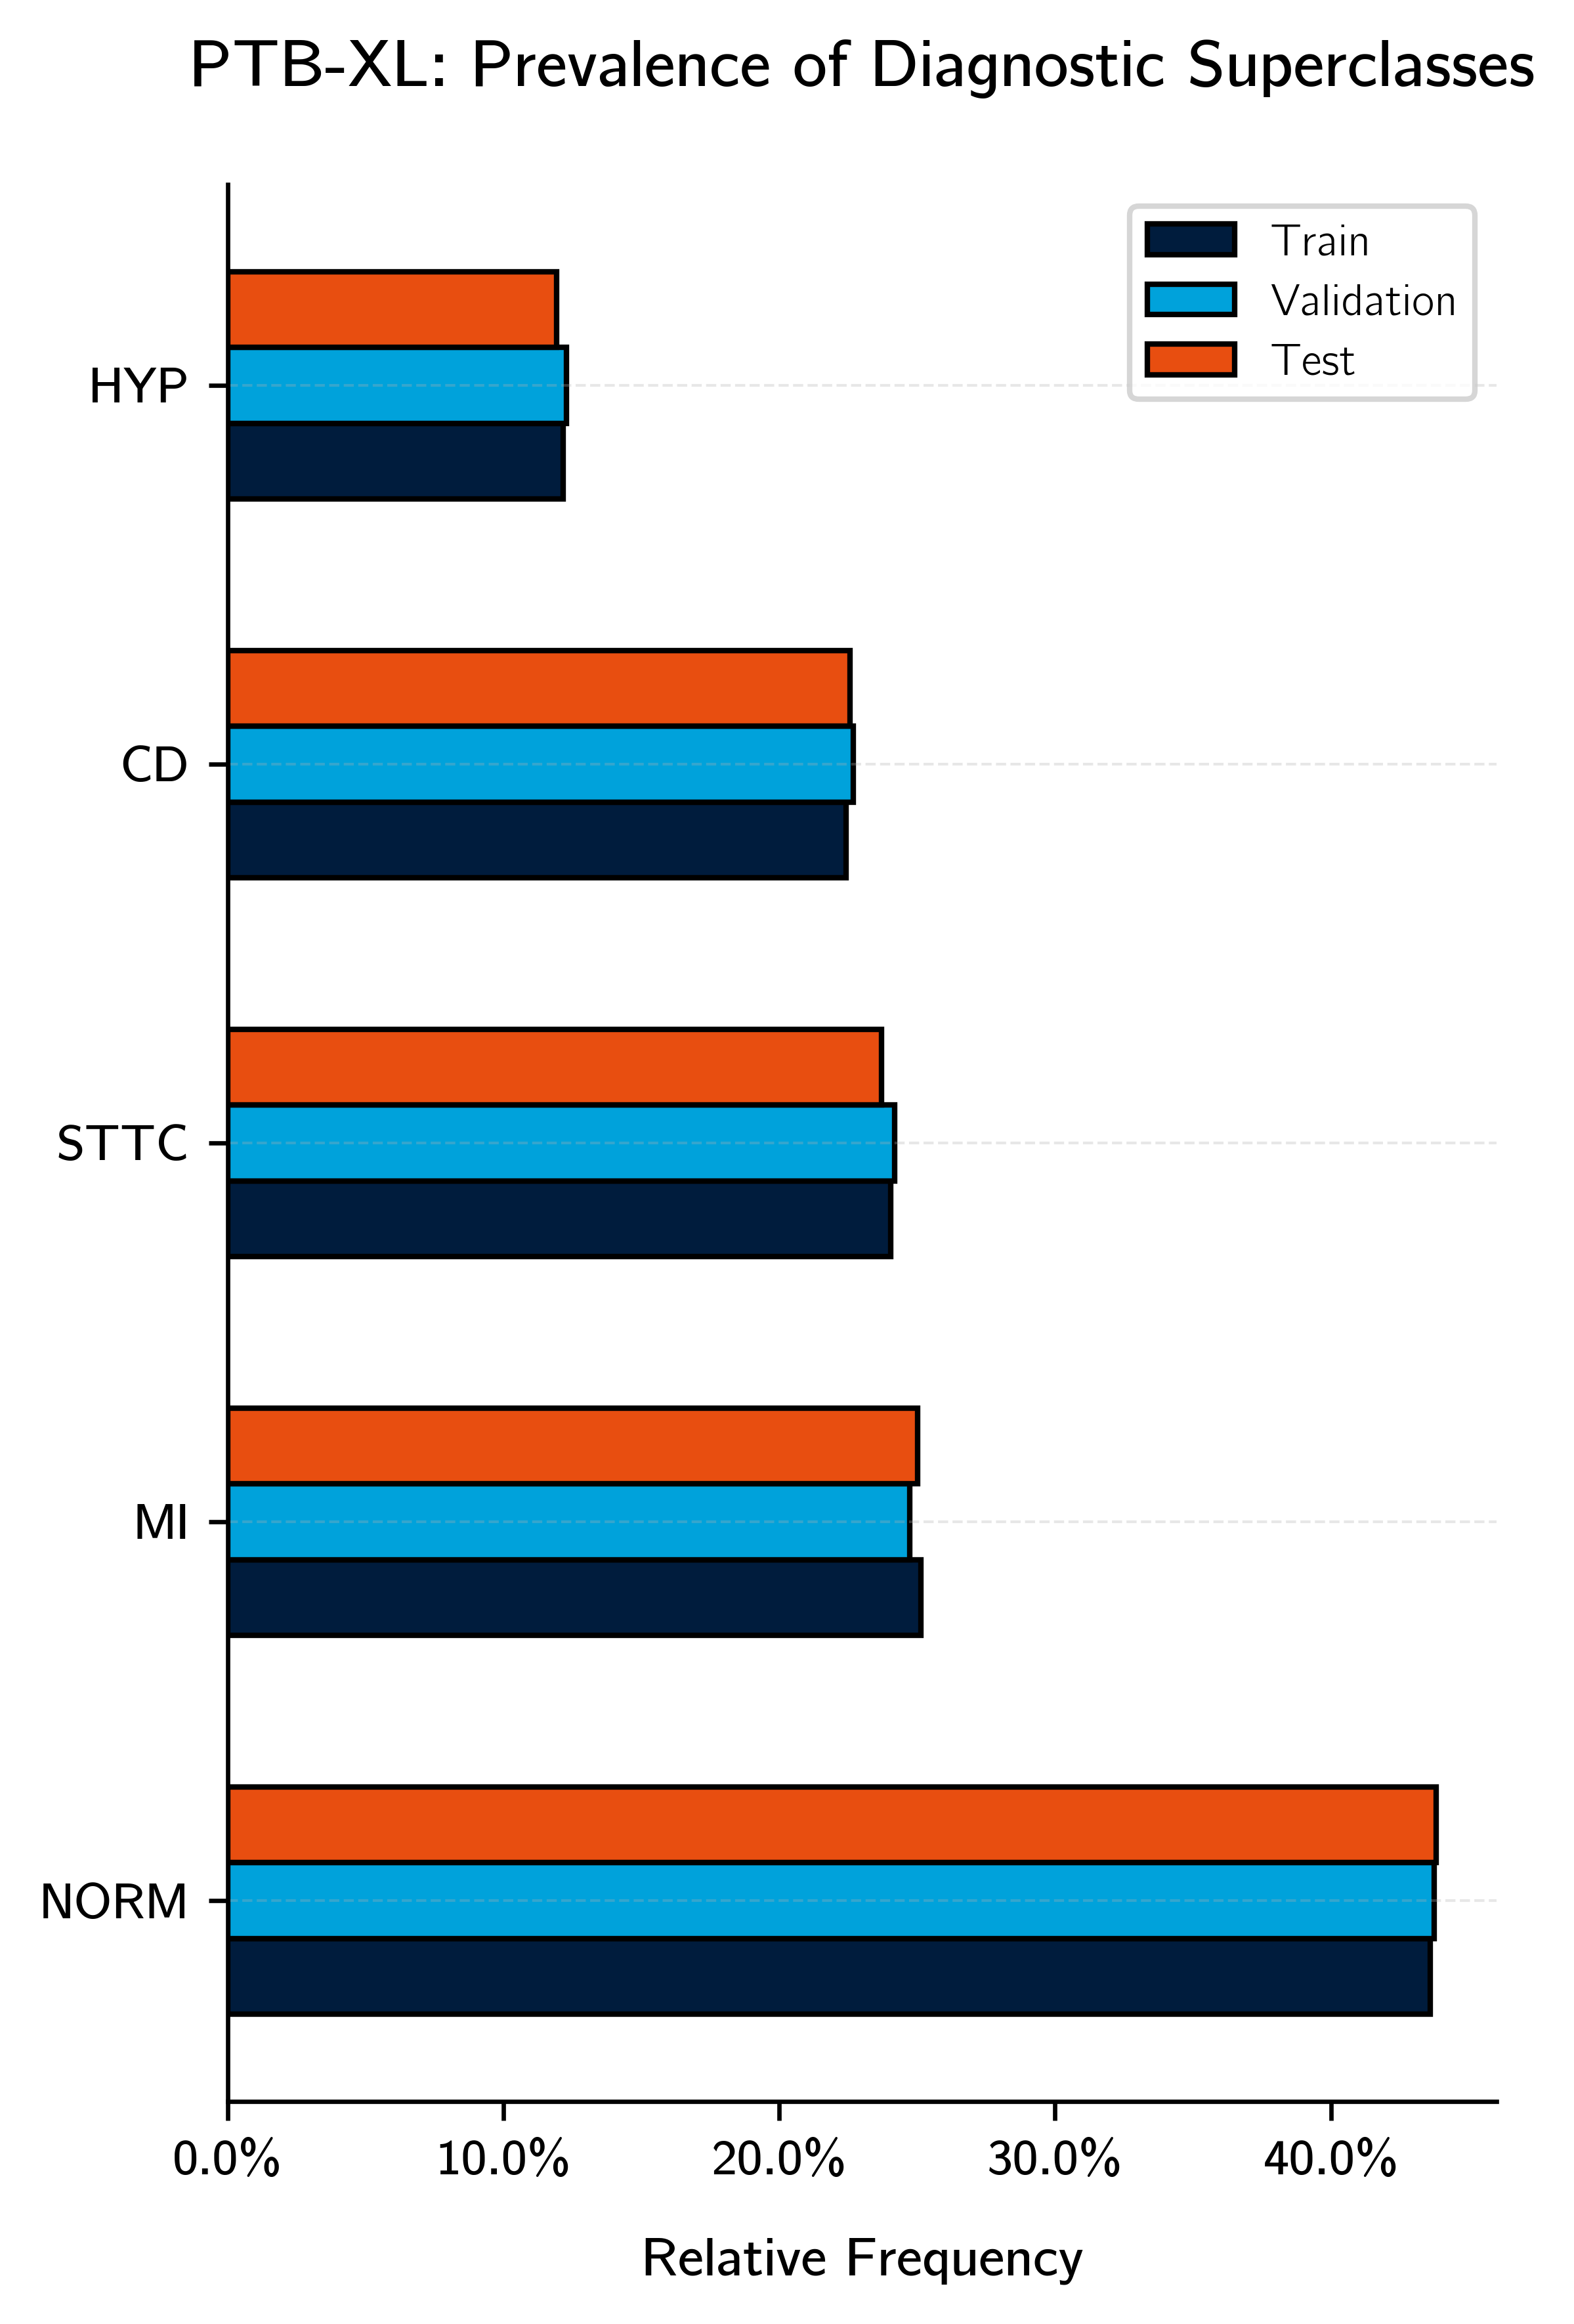

'figures/diagnostic_superclass_distribution_vertical'

In [3]:
# Plotting
fig, ax = plt.subplots(figsize=(4, 6), dpi=600)

# Bar specs
h, y = 0.2, np.arange(len(train_superclass_counts))

# Bars
ax.barh(y - w, train_superclass_counts.values, label='Train', alpha=1, height=h, color=dark_blue, edgecolor='black')
ax.barh(y, val_superclass_counts.values, label='Validation', alpha=1, height=h, color=light_blue, edgecolor='black')
ax.barh(y + w, test_superclass_counts.values, label='Test', alpha=1, height=h, color=orange_red, edgecolor='black')

# X-axis
code_to_label = {
    'NORM': 'Normal',
    'MI': 'Myocardial Infarction',
    'STTC': 'ST-T Changes',
    'HYP': 'Hypertrophy',
    'CD': 'Conduction Disturbance'
}
ax.set_yticks(y)
ax.set_yticklabels([code for code in train_superclass_counts.index], rotation=0, ha='right', fontsize=9, fontweight='semibold')

# Y-axis
ax.set_xlabel('Relative Frequency', fontsize=10, fontweight='semibold', labelpad=10)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
for label in ax.get_xticklabels():
    label.set_fontweight('semibold')
    label.set_fontsize(9)

# Annotate bars with % values
#for container in ax.containers:
    #ax.bar_label(container, labels=[f'{v*100:0.1f}%' for v in container.datavalues], padding=3, fontsize=8)

# Title and legend
ax.set_title('PTB-XL: Prevalence of Diagnostic Superclasses', pad=18, fontsize=12, weight='bold')
ax.legend(frameon=True, fontsize=8, loc="upper right")

# Aesthetics
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.3)

fig.tight_layout()

# Save publication ready figure
file_path = 'figures/diagnostic_superclass_distribution_vertical'
fig.savefig(file_path + '.pdf', format='pdf', bbox_inches='tight')
fig.savefig(file_path + '.png', format='png', dpi=600, bbox_inches='tight')

plt.show()

file_path

In [ ]:
%load_ext autoreload
%autoreload 2

import torch
import wandb
from torch.utils.data import DataLoader
from omegaconf import OmegaConf
from bachelors_thesis.modeling.siglabv2.siglabv2 import SigLabV2
from bachelors_thesis.modeling.datasets.sigloc_dataset import SigLocDataset
from bachelors_thesis.data.preprocessing import highpass
from bachelors_thesis.utils import apply_preprocessors, PRECORDIAL_LEAD_NAMES
from bachelors_thesis.utils import plot_ecg
from bachelors_thesis.data.load_ptbdata_new import ALL_LEADS, PRECORDIAL_LEADS
from bachelors_thesis.run import lead_sets

val_data = np.load('../../data/processed/ptbxl100all/all/val.npy')
# Apply highpass filter
val_data = highpass(val_data, sampling_rate=100)

In [25]:
project_path = "nateml-maastricht-university/bachelors-thesis"
run_id = "83mabq4k"
version = "v22"
#run_id = "yh0by5uj"
#version = "v30"
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the torch model from wandb
api = wandb.Api()

run = api.run(f"{project_path}/{run_id}")
config = dict(run.config)

# Get the run name
run_name = run.name

artifact = api.artifact(f"{project_path}/{run_name}:{version}")
artifact_path = artifact.download()

# Convert config to omegaconf
cfg = OmegaConf.create(config)

# Load the model
checkpoint = torch.load(artifact_path + f"/{run_name}.pth", map_location=device)

# Cast the model to the correct type
model = SigLabV2(cfg.model).to(device)
model.load_state_dict(checkpoint)
model.eval()  # Put into evaluation mode

# Count number of parameters
print(f"Loaded model from wandb: {run_name}")

wandb:   1 of 1 files downloaded.  


Loaded model from wandb: 88_siglabv2_all


In [68]:
dataset_path = Path("../../" + cfg.dataset.path)
if OmegaConf.select(cfg, "dataset.only_precordial"):
    dataset_path = dataset_path / "precordial"
else:
    dataset_path = dataset_path / "all"
dataset_path = dataset_path.resolve()

val_data = np.load(dataset_path / "val.npy")
test_data = np.load(dataset_path / "test.npy")

# Apply preprocessors
val_data = apply_preprocessors(val_data,
                               cfg.dataset.sampling_rate,
                               cfg.preprocessor_group.preprocessors)
test_data = apply_preprocessors(test_data,
                                 cfg.dataset.sampling_rate,
                                 cfg.preprocessor_group.preprocessors)
 
# Convert to torch tensor
val_data = torch.from_numpy(val_data).float().to(device)
val_data = val_data.permute(0, 2, 1)
print(val_data.shape)

test_data = torch.from_numpy(test_data).float().to(device)
test_data = test_data.permute(0, 2, 1)

# Create the dataset and dataloader
lead_filter = lead_sets[OmegaConf.select(cfg, "run.leads", default="precordial")]
dataset = SigLocDataset(test_data, filter_leads=lead_filter)
batch_size = 32
dataloader = DataLoader(dataset,
                        batch_size=batch_size,
                        shuffle=False)

# I need to reorder val_data to match the order of the labels in the dataset
if OmegaConf.select(cfg, "dataset.only_precordial") or OmegaConf.select(cfg, "dataset.only_precordial") is None:
    val_data = val_data[:, [PRECORDIAL_LEADS.index(lead) for lead in lead_filter], :]
    test_data = test_data[:, [PRECORDIAL_LEADS.index(lead) for lead in lead_filter], :]
else:
    val_data = val_data[:, [ALL_LEADS.index(lead) for lead in lead_filter], :]
    test_data = test_data[:, [ALL_LEADS.index(lead) for lead in lead_filter], :]

# Load metadata
meta_val = pd.read_csv(dataset_path / "meta_val.csv")
meta_test = pd.read_csv(dataset_path / "meta_test.csv")
meta = meta_test.copy()
meta['scp_codes'] = meta['scp_codes'].apply(lambda x: ast.literal_eval(x))

THRESHOLD = 0.5
def codes_above_threshold(code_dict, thr=THRESHOLD):
    return {code for code, prob in code_dict.items() if prob >= thr}

meta["present_codes"] = meta["scp_codes"].apply(lambda x: codes_above_threshold(x, THRESHOLD))

# Treat diagnostic superclass as lists
meta["diagnostic_superclass"] = meta["diagnostic_superclass"].apply(lambda x: ast.literal_eval(x))
# Now convert to a set
meta["diagnostic_superclass"] = meta["diagnostic_superclass"].apply(lambda x: set(x))

c = cfg.model.num_classes
logits = np.zeros((len(dataset), c, c))
init_logits = np.zeros((len(dataset), c, c))
targets = np.zeros((len(dataset), c))

for idx, (signals, lead_labels) in enumerate(dataloader):
    signals = signals.to(device)
    lead_labels = lead_labels.to(device)

    # Make predictions
    with torch.no_grad():
        these_logits = model(signals)
        logits[(idx * batch_size):(idx * batch_size + batch_size)] = these_logits.cpu().numpy()
        targets[(idx * batch_size):(idx * batch_size + batch_size)] = lead_labels.cpu().numpy()

predictions = logits.argmax(axis=-1)
print(predictions.shape)

torch.Size([2183, 12, 1000])
(2198, 12)


In [79]:
# Find when V6 and V1 are confused
v2_v3_confusion = np.where((predictions[:, 1] == 2) & (predictions[:, 2] == 1))[0]
norm_idx = np.where(test_meta['diagnostic_superclass'].apply(lambda x: 'NORM' in x))[0]
print(f"Number of V2-V3 confusions: {len(v2_v3_confusion)}")
print(f"Indices of V2-V3 confusions: {v2_v3_confusion}")
print(f"Indices of V2-V3 confusions in normal cases: {np.intersect1d(v2_v3_confusion, norm_idx)}")

Number of V2-V3 confusions: 12
Indices of V2-V3 confusions: [ 184  347  414  710  794 1097 1218 1384 1413 1479 1507 1824]
Indices of V2-V3 confusions in normal cases: [1218]


In [71]:
#idx = np.where(val_meta['ecg_id'] == 3807)[0]
#val_meta.iloc[idx]

idx = v1_v6_confusion[0]
test_meta.iloc[idx]

Unnamed: 0                                                                  12484
ecg_id                                                                      12516
patient_id                                                                 7714.0
age                                                                          82.0
sex                                                                             0
height                                                                      183.0
weight                                                                       86.0
nurse                                                                         8.0
site                                                                          1.0
device                                                                 AT-6     6
recording_date                                                1994-07-20 10:44:51
report                          pacemaker spikes noted. a regular paced rhythm...
scp_codes       

In [82]:
print(test_meta.iloc[idx])

Unnamed: 0                                           10963
ecg_id                                               10990
patient_id                                          1122.0
age                                                   44.0
sex                                                      1
height                                               158.0
weight                                                 NaN
nurse                                                 10.0
site                                                   1.0
device                                          AT-6 C 5.5
recording_date                         1993-09-11 10:59:06
report                           sinus rhythm. normal ecg.
scp_codes                       {'NORM': 100.0, 'SR': 0.0}
heart_axis                                             NaN
infarction_stadium1                                    NaN
infarction_stadium2                                    NaN
validated_by                                           0

<Axes: title={'center': 'ECG signals array | sr=100 Hz'}, xlabel='Samples', ylabel='Leads'>

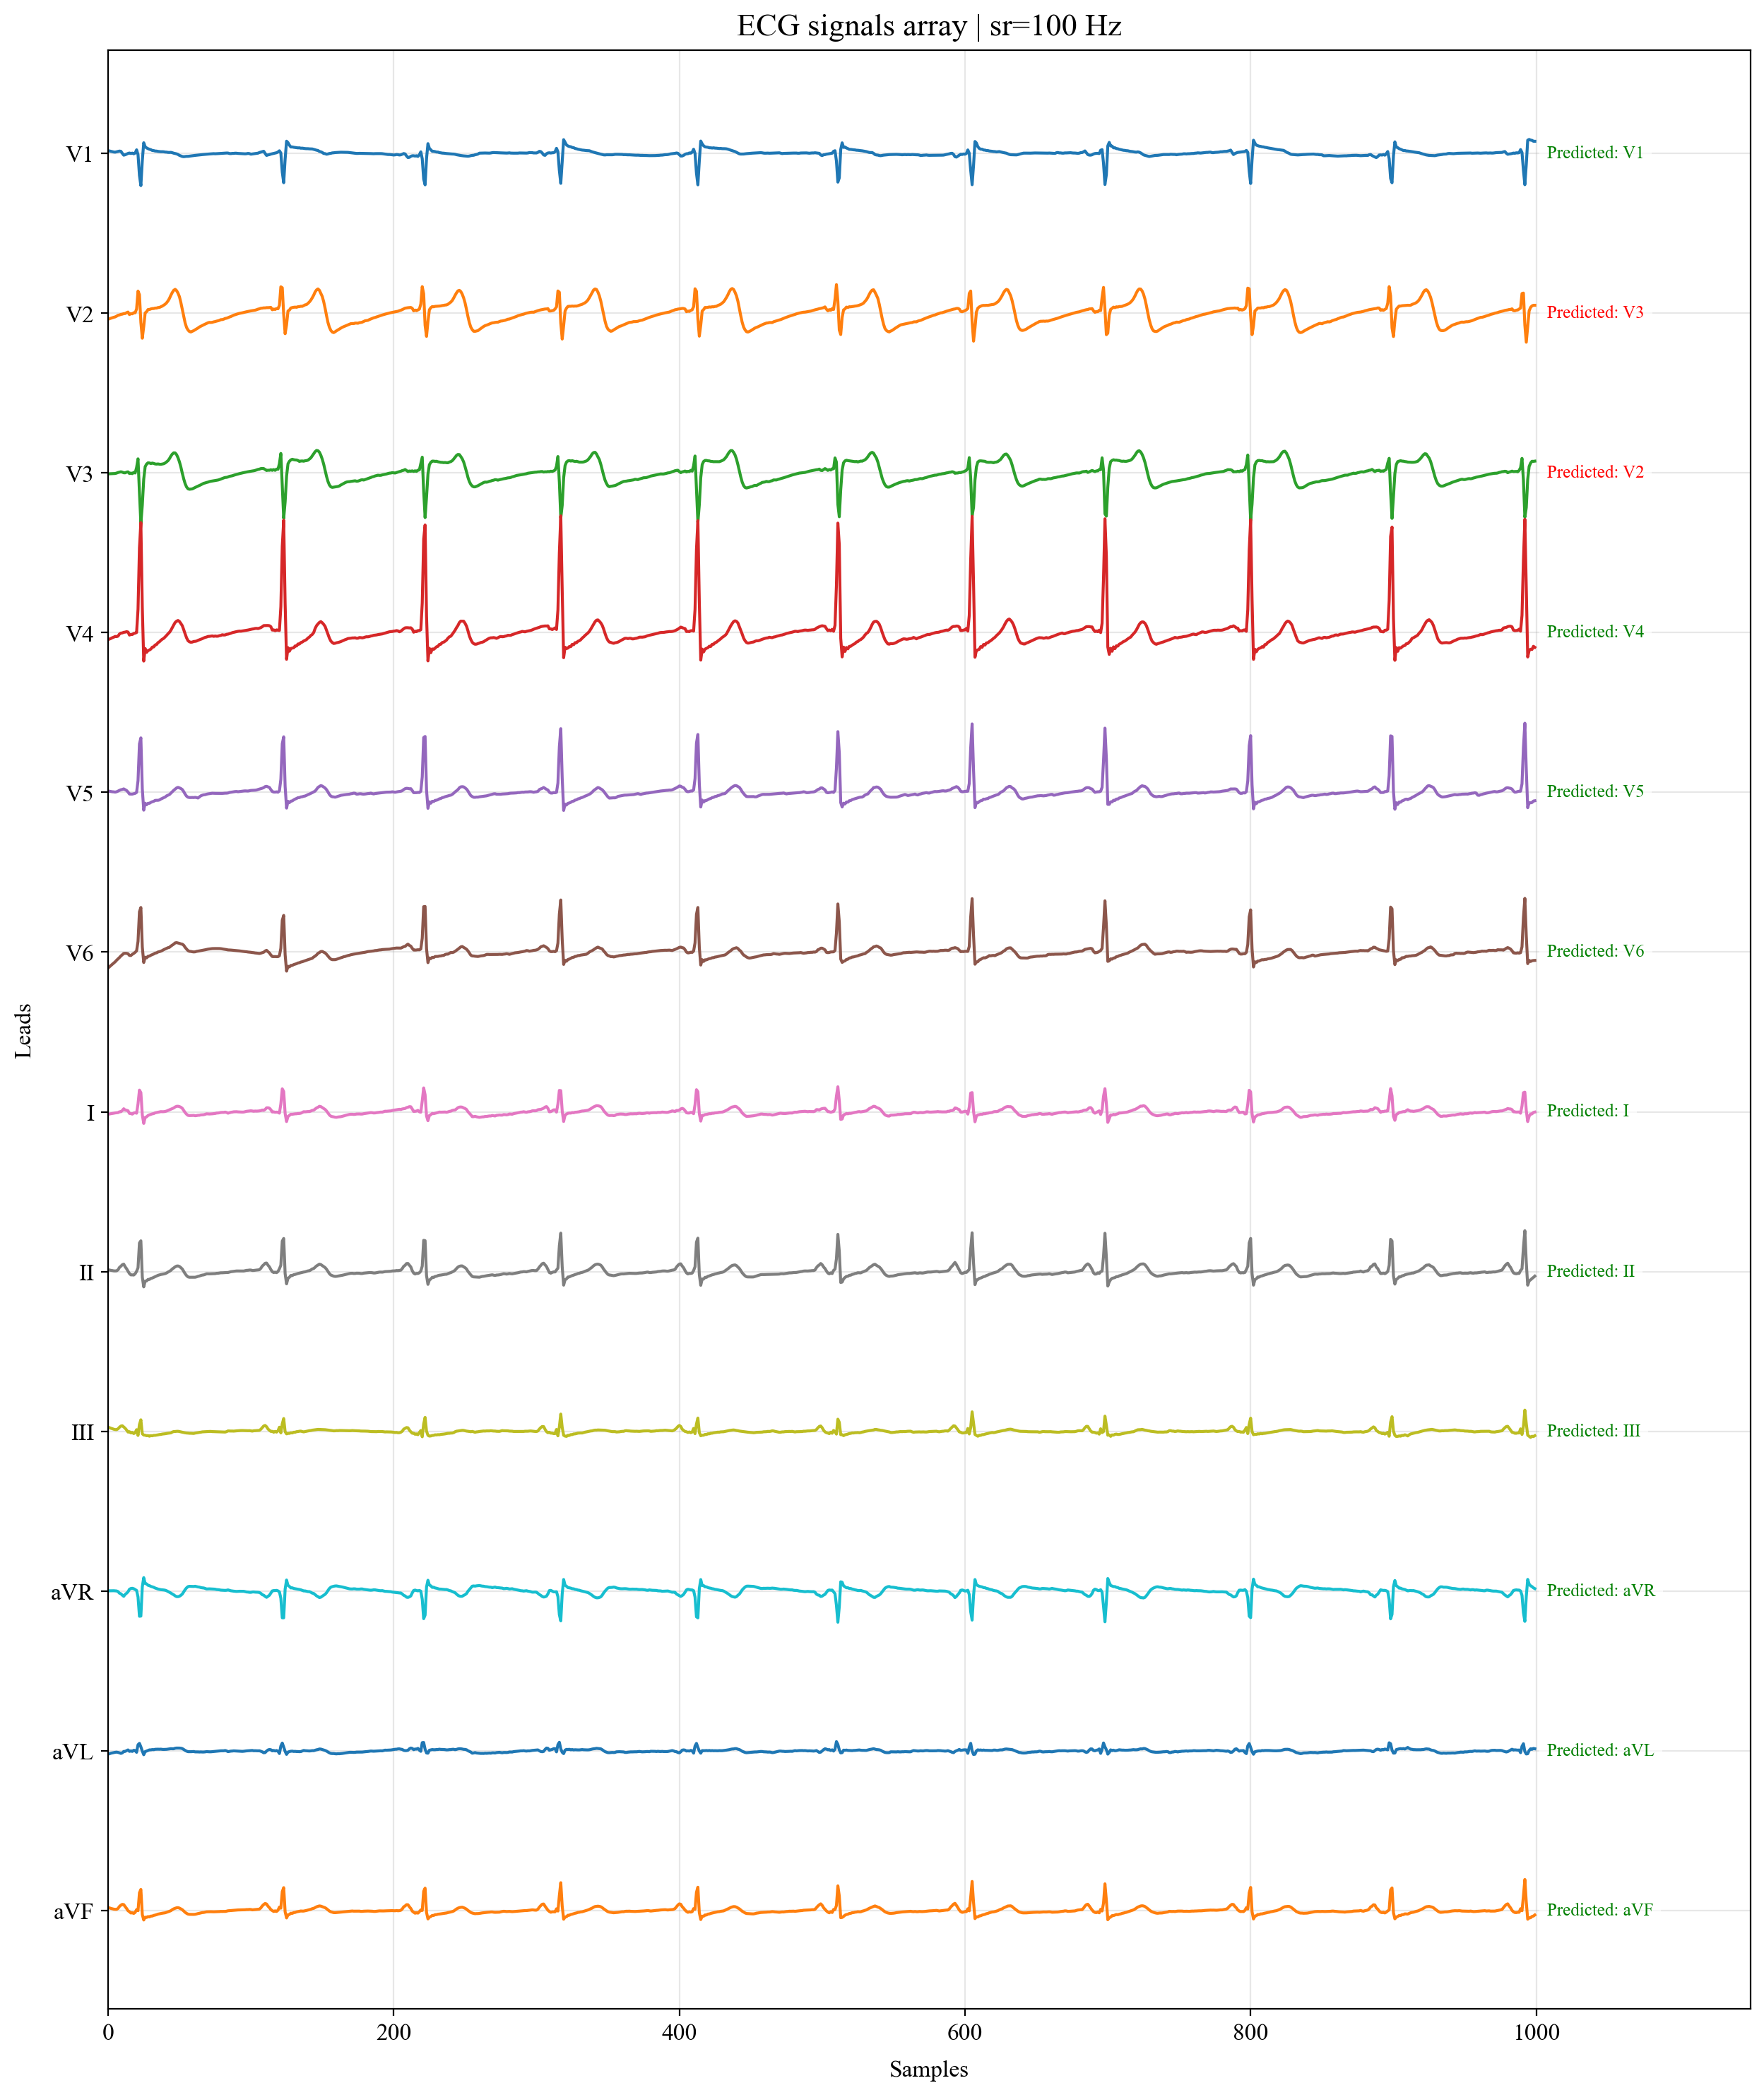

In [80]:
idx = 1218
plot_ecg(test_data[idx].cpu().numpy(), 100, leads=lead_filter, predictions=[lead_filter[i] for i in predictions[idx]], spacing=1.1, dpi=200, width=15)

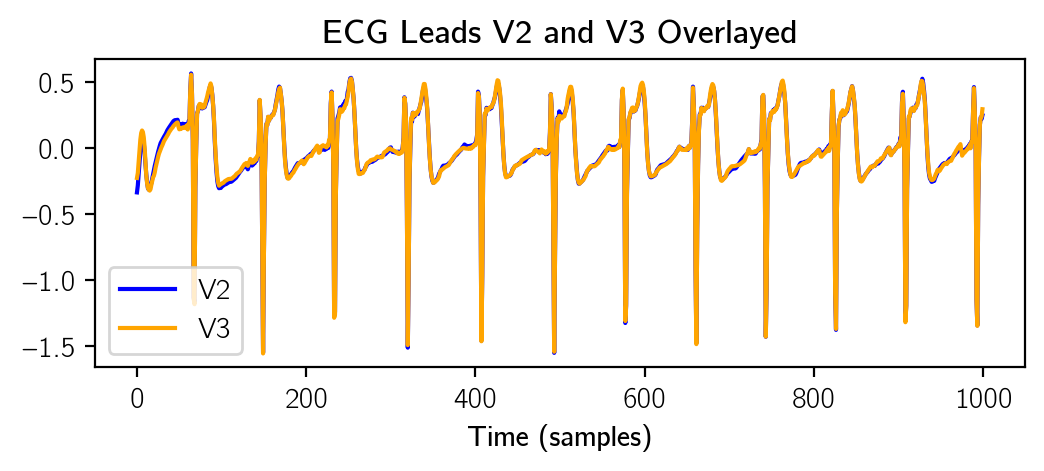

In [66]:
# Only plot V2 and V3 overlayed
plt.figure(figsize=(6, 2), dpi=200)
plt.plot(val_data[idx[0], lead_filter.index('V2')].cpu().numpy(), label='V2', color='blue')
plt.plot(val_data[idx[0], lead_filter.index('V3')].cpu().numpy(), label='V3', color='orange')
plt.title('ECG Leads V2 and V3 Overlayed', fontsize=12, fontweight='bold')
plt.xlabel('Time (samples)', fontsize=10, fontweight='semibold')
plt.legend()